##### Exercici 2

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('atp.csv', index_col=False, warn_bad_lines=True, error_bad_lines=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   266 non-null    int64  
 1   surface      266 non-null    object 
 2   winner_name  266 non-null    object 
 3   hand_R       266 non-null    int64  
 4   hand_L       266 non-null    int64  
 5   winner_ht    266 non-null    float64
 6   Continent    266 non-null    object 
 7   winner_age   266 non-null    int64  
 8   winner_rank  266 non-null    float64
 9   round        266 non-null    object 
 10  minutes      266 non-null    int64  
 11  w_ace        266 non-null    float64
 12  w_df         266 non-null    float64
 13  w_svpt       266 non-null    float64
 14  w_1stIn      266 non-null    float64
 15  w_1stWon     266 non-null    float64
 16  w_2ndWon     266 non-null    float64
 17  w_SvGms      266 non-null    float64
 18  w_bpSaved    266 non-null    float64
 19  w_bpFace

##### Simplifiquem la base de dades a 4 atributs numèrics i un categòric per fer un PCA de 2 components 

In [3]:
pcadf=df.iloc[:, [6,11,13,15,16]]

In [4]:
pcadf.columns=['Continent', 'aces', 'service_point','1stWon' ,'2ndWon']
pcadf.head()

,Continent,aces,service_point,1stWon,2ndWon
0,Europe,7.0,77.0,41.0,12.0
1,Europe,4.0,58.0,27.0,18.0
2,Asia,1.0,77.0,37.0,14.0
3,North America,23.0,97.0,50.0,16.0
4,Europe,3.0,94.0,42.0,23.0


In [5]:
#Estandaritzem les columnes numèriques

from sklearn.preprocessing import StandardScaler

features = ['aces', 'service_point','1stWon' ,'2ndWon'] # Separating out the features
x = pcadf.loc[:, features].values # Separating out the target
y = pcadf.loc[:,['Continent']].values # Standardizing the features
x = StandardScaler().fit_transform(x)

In [6]:
#Simplifiquem les 4 dimensions inicials a 2 (n_components=2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['component_1', 'component_2'])
principalDf.head()

,component_1,component_2
0,-0.881672,0.256257
1,-1.422518,-0.330981
2,-1.207217,-0.520039
3,0.833019,1.593131
4,-0.105586,-0.978244


In [7]:
pcadf['Continent'].unique()

array(['Europe', 'Asia', 'North America', 'Oceania', 'South America',
       'Africa'], dtype=object)

In [8]:
#Es torna a afegir la columna categòrica anteriorment reservada
finalDf = pd.concat([principalDf, pcadf[['Continent']]], axis = 1)

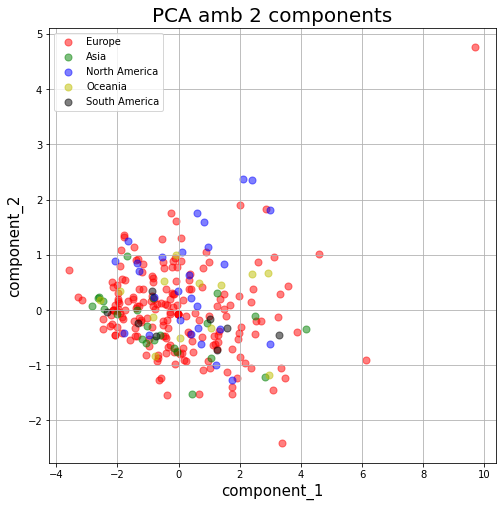

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('component_1', fontsize = 15)
ax.set_ylabel('component_2', fontsize = 15)
ax.set_title('PCA amb 2 components', fontsize = 20)

targets = pcadf['Continent'].unique()
colors = ['r', 'g', 'b', 'y', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Continent'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'component_1'] , finalDf.loc[indicesToKeep, 'component_2'], c = color
               , s = 50, alpha=0.5)
ax.legend(targets)
ax.grid()

In [10]:
#df['age']=pd.cut(df['winner_age'],3, labels=["junior", "mid", "senior"])
#df['height']=pd.cut(df['winner_ht'],3, labels=["short", "mid", "tall"])

##### Simplifiquem les alçades i les edats a 3 categories

In [11]:
df['age'] = pd.qcut(df['winner_age'], q=3,labels=["junior", "mid", "senior"])
df['height']=pd.qcut(df['winner_ht'],q=3, labels=["short", "mid", "tall"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Unnamed: 0   266 non-null    int64   
 1   surface      266 non-null    object  
 2   winner_name  266 non-null    object  
 3   hand_R       266 non-null    int64   
 4   hand_L       266 non-null    int64   
 5   winner_ht    266 non-null    float64 
 6   Continent    266 non-null    object  
 7   winner_age   266 non-null    int64   
 8   winner_rank  266 non-null    float64 
 9   round        266 non-null    object  
 10  minutes      266 non-null    int64   
 11  w_ace        266 non-null    float64 
 12  w_df         266 non-null    float64 
 13  w_svpt       266 non-null    float64 
 14  w_1stIn      266 non-null    float64 
 15  w_1stWon     266 non-null    float64 
 16  w_2ndWon     266 non-null    float64 
 17  w_SvGms      266 non-null    float64 
 18  w_bpSaved    266 non-null    f

##### Repetim amb les alçades dividides en 3 grups per veure si té més relevància

In [13]:

pcadf1=df.iloc[:, [21,11,13,15,16]]
pcadf1.columns=['height', 'aces', 'service_point','1stWon' ,'2ndWon']

In [14]:
pcadf1.head(3)

,height,aces,service_point,1stWon,2ndWon
0,mid,7.0,77.0,41.0,12.0
1,mid,4.0,58.0,27.0,18.0
2,short,1.0,77.0,37.0,14.0


In [15]:
#Estandaritzem les columnes numèriques

features = ['aces', 'service_point','1stWon' ,'2ndWon'] # Separating out the features
x = pcadf1.loc[:, features].values # Separating out the target
y = pcadf1.loc[:,['height']].values # Standardizing the features
x = StandardScaler().fit_transform(x)

In [16]:
#Simplifiquem les 4 dimensions inicials a 2 (n_components=2)

pca1 = PCA(n_components=2)
principalComponents1 = pca1.fit_transform(x)
principalDf1 = pd.DataFrame(data = principalComponents1, columns = ['component_1', 'component_2'])
principalDf1.head()

,component_1,component_2
0,-0.881672,0.256257
1,-1.422518,-0.330981
2,-1.207217,-0.520039
3,0.833019,1.593131
4,-0.105586,-0.978244


In [17]:
#Es torna a afegir la columna categòrica anteriorment reservada
finalDf1 = pd.concat([principalDf1, pcadf1[['height']]], axis = 1)

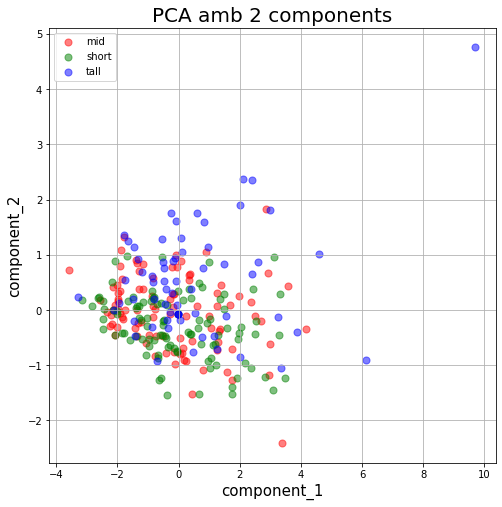

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('component_1', fontsize = 15)
ax.set_ylabel('component_2', fontsize = 15)
ax.set_title('PCA amb 2 components', fontsize = 20)

targets = pcadf1['height'].unique()
colors = ['r', 'g', 'b', 'y', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf1['height'] == target
    ax.scatter(finalDf1.loc[indicesToKeep, 'component_1'] , finalDf1.loc[indicesToKeep, 'component_2'], c = color
               , s = 50, alpha=0.5)
ax.legend(targets)
ax.grid()

In [19]:
df1=pd.read_csv('atp_norm.csv', index_col=False, warn_bad_lines=True, error_bad_lines=False)
df1=df1.drop(['Unnamed: 0', 'name'], axis=1)
df1.head(3)
print(list(df1.columns))

['hand_R', 'hand_L', 'height', 'age', 'rank', 'minutes', 'ace', 'df', 'vpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'bpFaced', 'round_QF', 'round_R128', 'round_R16', 'round_R32', 'round_R64', 'round_SF', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']


In [20]:
pca = PCA(.95)

In [21]:
principalComponents2 = pca.fit_transform(x)
principalDf2 = pd.DataFrame(data = principalComponents2)
principalDf2.head()

,0,1,2
0,-0.881672,0.256257,0.597060
1,-1.422518,-0.330981,-0.454931
2,-1.207217,-0.520039,0.534834
3,0.833019,1.593131,0.042085
4,-0.105586,-0.978244,-0.032081


##### Exercici 3
Aprofitem per veure els atributs amb més outliers 

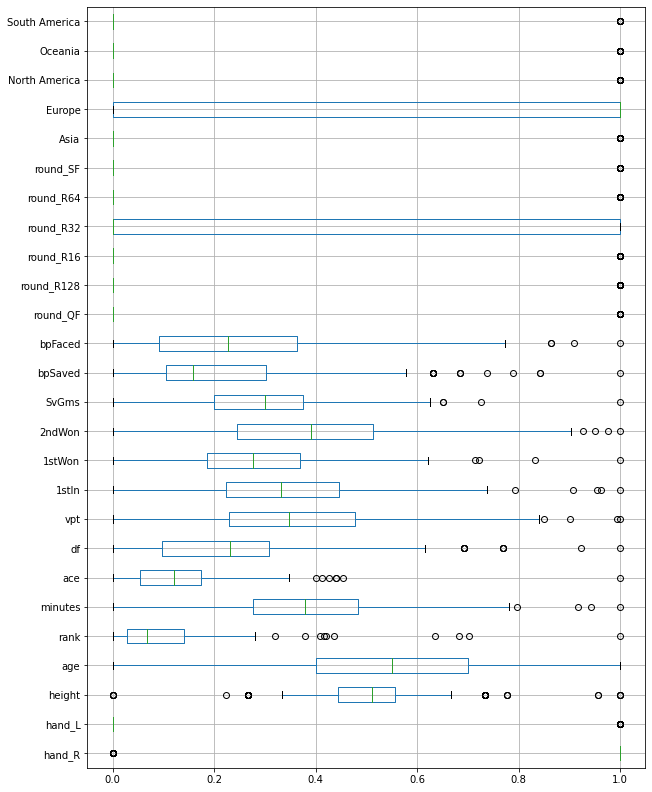

In [22]:
df1.boxplot(column=list(df1.columns), return_type='axes',vert=False, figsize=(10, 14))

In [69]:
# Seleccionem les columnes amb més aoutliers
atp_out=df1[['height',  'rank', 'minutes', 'ace', 'df', 'vpt', '1stIn', '1stWon', 'SvGms', 'bpSaved', 'bpFaced']]

In [64]:
#Farem servir RobustScaler per reduir la  dels ouliers
from sklearn.preprocessing import RobustScaler
robust = RobustScaler().fit(atp_out)
robust.transform(atp_out)


array([[ 0.4       , -0.30188679, -0.16988417, ..., -0.14285714,
         0.53333333,  0.33333333],
       [ 0.4       , -0.30188679, -0.49420849, ..., -0.57142857,
        -0.8       , -0.83333333],
       [-1.6       , -0.52830189, -0.27799228, ..., -0.42857143,
         0.26666667,  0.        ],
       ...,
       [-0.2       , -0.30188679,  1.003861  , ...,  1.42857143,
         1.33333333,  1.16666667],
       [-0.2       , -0.45283019,  2.73359073, ...,  2.        ,
         2.4       ,  1.83333333],
       [-0.2       , -0.30188679,  1.51351351, ...,  1.14285714,
         2.66666667,  2.        ]])

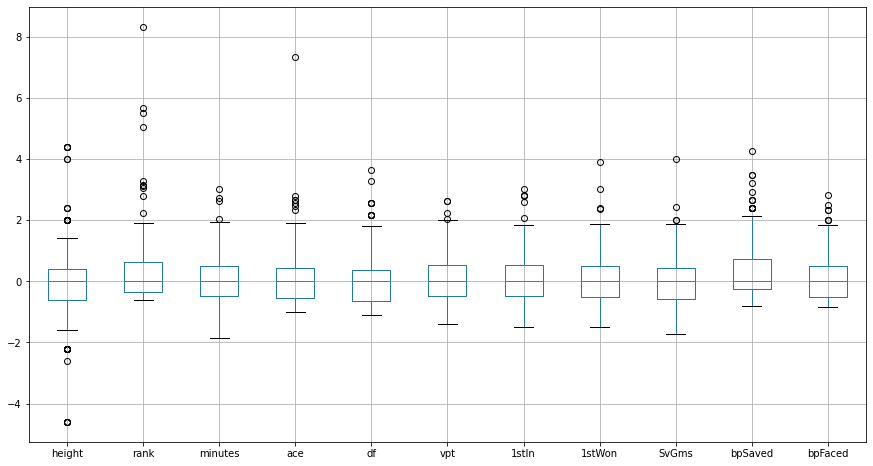

In [65]:
df_robust = pd.DataFrame(robust.transform(atp_out), columns=atp_out.columns)
df_robust.boxplot(column=list(df_robust.columns), return_type='axes',vert=True, figsize=(15, 8))

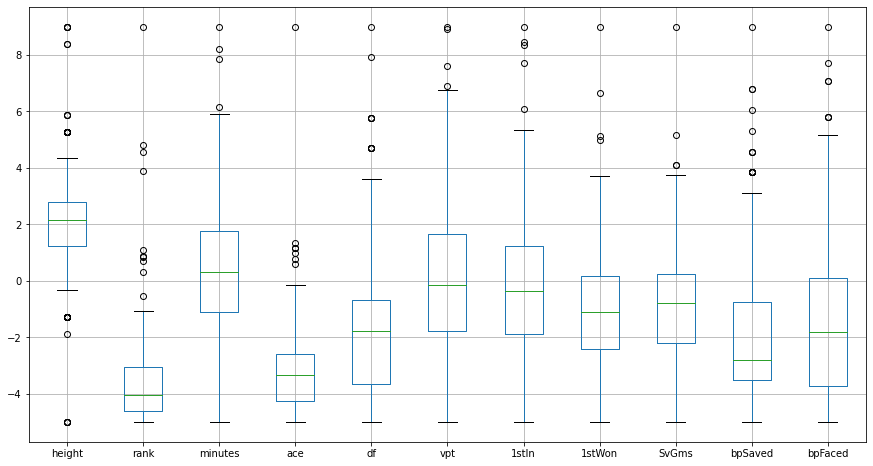

In [68]:
#Farem una normalització MaxMix per poder comparar estandaritzacions amb el mateix rang
from sklearn.preprocessing import MinMaxScaler
maxscaler = MinMaxScaler(feature_range=(-5,9))
maxscaler.fit_transform(atp_out)

df_mima = pd.DataFrame(maxscaler.fit_transform(atp_out), columns=atp_out.columns)
df_mima.boxplot(column=list(df_mima.columns), return_type='axes',vert=True, figsize=(15, 8))

Amb aquestes dues visualitzacions veiem la diferència quan normalitzem tenint en compte els outliers amb RobustScaler (el més apropiat) i  MinMaxScaler (no tan efectiu)